# The Spark Foundation #GRIPOCT21

# TASK 1 - Prediction using Supervised ML

## Problem Statement:

- Predict the percentage of marks that a student is expected to score based upon the number of hours they studied. 
- This is a simple linear regression task as it involves just two variables.

### Author: Sachin Pathania

### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
import warnings
warnings.filterwarnings('ignore')

### Loading the dataset

In [2]:
df = pd.read_csv('http://bit.ly/w-data')
df.head() #checking first 5 rows

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
df.shape #total 25 rows and 2 columns in the dataset

(25, 2)

In [4]:
df.info() 
#Checking the information of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
df.isnull().sum() 
#no null value present

Hours     0
Scores    0
dtype: int64

## Check the relationship between Hours and Scores

### Checking the correlation between independent and target variables

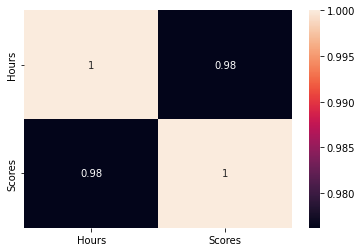

In [6]:
sns.heatmap(df.corr(),annot=True)
plt.show()

- Hours are highly correlated to Scores

### Scatterplot 

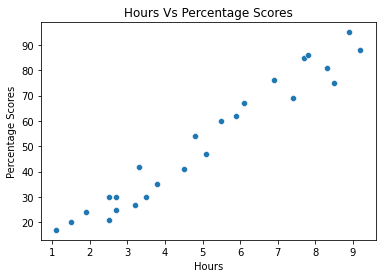

In [7]:
sns.scatterplot(df['Hours'],df['Scores'])
plt.xlabel('Hours')
plt.ylabel('Percentage Scores')
plt.title('Hours Vs Percentage Scores')
plt.title('Hours Vs Percentage Scores')
plt.show()

### Linear Regression plot

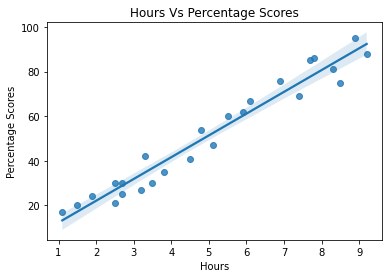

In [8]:
sns.regplot(df['Hours'],df['Scores'])
plt.xlabel('Hours')
plt.ylabel('Percentage Scores')
plt.title('Hours Vs Percentage Scores')
plt.show()

### From the Scatterplot & Regplot we can clearly see that there is positive relationship between hours & Scores

## Preparing the data

In [9]:
X= df.drop('Scores',axis=1)
Y= df['Scores']

### Spliting the data

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=8) 

In [11]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(20, 1) (5, 1) (20,) (5,)


## Model Building

In [12]:
lr = LinearRegression()  
lr.fit(X_train, y_train) 
print("Training completed")

Training completed


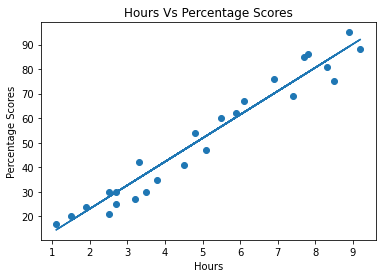

In [13]:
# Plotting the regression line
line = lr.coef_*X+lr.intercept_
plt.scatter(X,Y)
plt.plot(X, line)
plt.xlabel('Hours')
plt.ylabel('Percentage Scores')
plt.title('Hours Vs Percentage Scores')
plt.show()

### Model Score

In [14]:
print('R Square score : ',lr.score(X_train, y_train))

R Square score :  0.9516536821574559


### Prediction

In [15]:
y_pred=lr.predict(X_test)

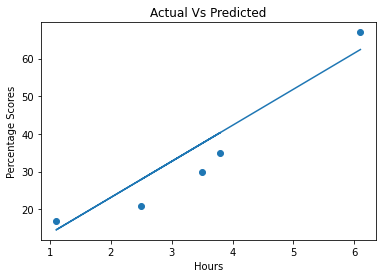

In [16]:
plt.scatter(X_test,y_test)
plt.plot(X_test, y_pred)
plt.xlabel('Hours')
plt.ylabel('Percentage Scores')
plt.title('Actual Vs Predicted')
plt.show()

### Comparing actual and predicted scores

In [17]:
data = pd.DataFrame({'Actual Scores: ': y_test,'Predicted Scores: ': y_pred})

In [18]:
data

,Actual Scores:,Predicted Scores:
18,67,62.409213
14,17,14.531745
4,30,37.512930
22,35,40.385578
0,21,27.937436


### User Defined function

In [19]:
def ch(x):
        l=lr.predict([[float(x)]])
        print('If student studies for {} hours/day than student will score {}'.format(x,*l))

In [20]:
ch(9.25)

If student studies for 9.25 hours/day than student will score 92.57201837282055


### Checking MSE/RMSE

In [21]:
from sklearn.metrics import mean_squared_error

In [22]:
mse=mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
print('Mean Squared error: ',mse)
print('Root Mean Squared error: ',rmse)

Mean Squared error:  32.14883623379885
Root Mean Squared error:  5.669994376875417


# END